# <center>Yellow Journalism (Fake News) Detection</center><br>
<img src = "https://c.files.bbci.co.uk/089D/production/_111750220_gettyimages-1215064495.jpg"></img><br>
#### <div align='right'>Made by: **Asad Mahmood</div>**

<a id='toc'></a>
# Table of contents
1. [Introduction](#Intro)
2. [Objective](#Obj)
3. [Exploratory Data Analysis](#EDA)
    1. Libraries and Custom Functions
    1. Understanding Data
    1. Data Preprocessing
    2. Data Exploration
    3. Visual Exploration
4. [Model Building](#Model)
    1. Libraries and Custom Functions
    1. Train and Test Split
    3. Fine Tuning Best Model
5. [Evaluation](#Eval)

## Introduction: What is Fake News ? <a name="introduction"></a>

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.<br>

[Return to TOC](#toc)

## Objective <a name="Obj"></a>

To build a classification model to accurately classify a piece of news as 'real' or 'fake'. Now, this is using twitter tweets and is an example project of using Passive Aggresive Clasfier algorithim.

[Return to TOC](#toc)

## Exploratory Data Analysis <a name="EDA"></a>

### Libraries and Custom Functions

In [1]:
import pandas as pd
import numpy as np

In [2]:
'''
Description: Provides basic details regarding the input dataframe such as its shape,
             info and number of missing values in the data. 
Input: Dataframe Object
Output: None.
'''
def data_info(df):
    line = '--------------------------------------------------------\n'
    print('Information about Data:\n')
    shape = df.shape
    print(line,'Shape of data is as follows:\n', '\tRows:', shape[0],'\n','\tColumns:', shape[1], '\n',line)
    print(line, 'Core Dataframe Summary:')
    df.info()
    print('\n', line)
    print(line, "Count total NaN at each column in a DataFrame :\n\n", df.isnull().sum(),'\n',line) 

In [3]:
'''
Description: Splits data into features and labels
Inputs:
    1) df: A Dataframe object
    2) fStart: X Start Column index
    3) fEnd: X End Column index
    4) lCol: y Column index
Output:
    1) X: All features
    2) y: The labels
'''
def feature_label_split(df, features, label):
    X = df[features]
    y = df[label]
    
    # In this scenario they need to be in series format for tdif
    return X, y

### Understanding Data

In [4]:
df = pd.read_csv('tweets.csv')

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# Used it to do eda but nothing of significance was found. Uncomment to use it.
#dtale.show(df)
data_info(df)

Information about Data:

--------------------------------------------------------
 Shape of data is as follows:
 	Rows: 6335 
 	Columns: 4 
 --------------------------------------------------------

--------------------------------------------------------
 Core Dataframe Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB

 --------------------------------------------------------

--------------------------------------------------------
 Count total NaN at each column in a DataFrame :

 Unnamed: 0    0
title         0
text          0
label         0
dtype: int64 
 --------------------------------------------------------



**Facts:**<br>
1. No missing values.
2. 4 columns and 6335 rows
3. One column has int data type and rest are string type.

### Data Preprocessing

In [7]:
# No Data cleaning required. Hence, going to proceed to divide the data into x and y 
'''
Parameters:
    1) df: The Data frame object
    2) fStart: I am passing 2
    3) fEnd: I am passing 3 the reason being I am going to use only one column as a feature which in this case is titled 'text'.
    4) lCol: I am passing 3 as it is the index of the label column
Output:
    1) X: Contains all feature columns
    2) y: Contains the label column
'''
feature_col = 'text'
label_col = 'label'
X, y = feature_label_split(df, feature_col, label_col)

[Return to TOC](#toc)

## Model Building <a name="Model"></a>

### Libraries and Functions

In [14]:
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### What is a PassiveAggressiveClassifier?
Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

So, why is it called passive aggresive?<br>
1. **Passive:** If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
2. **Aggresive:** If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

A very good example of this would be to detect fake news on a social media website like Twitter, where new data is being added every second. To dynamically read data from Twitter continuously, the data would be huge, and using an online-learning algorithm would be ideal.

NOTE: This is a high-level overview of the algorithm explaining how it works and when to use it. It does not go deep into the mathematics of how it works.

### What is a TfidfVectorizer?
**TF (Term Frequency):** The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency):** Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.<br>

### Train and Test Split

In [15]:
'''
Dividing data into train and test sets with the propotion set as 80% and 20% respectively.
'''
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.label, test_size=0.2, random_state=7)

### Passive Aggresive Model

In [16]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df = 1.0)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [17]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

## Evaluation <a name="Eval"></a>

In [73]:
def con_matrix(y_test, y_pred):
"""
    Description:
    ----------
    This function plots a confusion matrix.
    
    Parameters
    ----------
    y_test : True Y values of test set
    y_pred : Predicted Y values

    Output
    ------
    Labelled confusion matrix 
    """
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    
    # Calculate confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize it
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ## Set size of confusion matrix
    plt.figure(figsize = (8,5))
    
    ## Plot the heatmap
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens', cbar=False)

### Accuracy

In [74]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


### Confusion Matrix

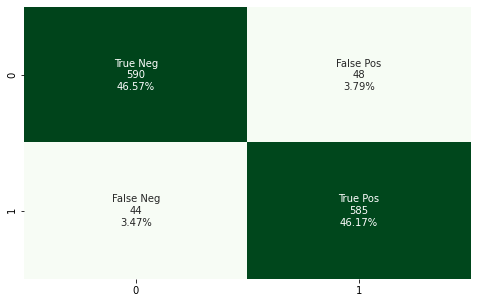

In [75]:
con_matrix(y_test, y_pred)

We got an accuracy of 92.82% with this model and we have 585 true positives, 590 true negatives, 48 false positives, and 44 false negatives.

[Return to TOC](#toc)